In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
cd /Users/fred/Umila/numila

/Users/fred/Umila/numila


In [5]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('whitegrid')

import main

In [ ]:
train_corpus, test_corpus = main.corpora(3000, 200)
models = main.get_models(train_corpus)

INFO:numila:parameters:

ADD_BOUNDARIES: false
BIND: false
BIND_OPERATION: addition
CHUNK_LEARNING: 0.2
CHUNK_THRESHOLD: null
DECAY: false
DIM: 10000
EXEMPLAR_THRESHOLD: 0.2
FTP_PREFERENCE: 1
GENERALIZE: !!python/tuple
- full
- 0.3
GRAPH: holograph
LEARNING_RATE: 0.1
MEMORY_SIZE: 4
PERCENT_NON_ZERO: 0.005
SEMANTIC_TRANSFER: 0.0


INFO:numila:parameters:

ADD_BOUNDARIES: false
BIND: false
BIND_OPERATION: addition
CHUNK_LEARNING: 0.2
CHUNK_THRESHOLD: null
DECAY: false
DIM: 10000
EXEMPLAR_THRESHOLD: 0.2
FTP_PREFERENCE: 1
GENERALIZE: false
GRAPH: holograph
LEARNING_RATE: 0.1
MEMORY_SIZE: 4
PERCENT_NON_ZERO: 0.005
SEMANTIC_TRANSFER: 0.0


INFO:numila:parameters:

ADD_BOUNDARIES: false
BIND: false
BIND_OPERATION: addition
CHUNK_LEARNING: 0.2
CHUNK_THRESHOLD: null
DECAY: false
DIM: 10000
EXEMPLAR_THRESHOLD: 0.05
FTP_PREFERENCE: 1
GENERALIZE: false
GRAPH: probgraph
LEARNING_RATE: 0.1
MEMORY_SIZE: 4
PERCENT_NON_ZERO: 0.005
SEMANTIC_TRANSFER: 0.0


INFO:numila:parameters:

ADD_BOUNDARIES: false


Timer (total): 9.377 seconds
Timer (10): 1.256 seconds
Timer (20): 2.753 seconds
Timer (30): 7.153 seconds
Timer (40): 9.725 seconds
Timer (50): 14.001 seconds
Timer (60): 18.950 seconds
Timer (70): 21.019 seconds
Timer (80): 27.306 seconds
Timer (90): 37.876 seconds
Timer (100): 44.193 seconds
Timer (110): 49.441 seconds
Timer (120): 59.178 seconds
Timer (130): 65.746 seconds
Timer (140): 81.318 seconds
Timer (150): 97.742 seconds
Timer (160): 109.036 seconds
Timer (170): 115.354 seconds
Timer (180): 131.023 seconds
Timer (190): 145.712 seconds
Timer (200): 157.517 seconds
Timer (210): 176.758 seconds
Timer (220): 191.961 seconds
Timer (230): 211.912 seconds
Timer (240): 243.610 seconds
Timer (250): 259.408 seconds
Timer (260): 281.439 seconds
Timer (270): 302.848 seconds
Timer (280): 318.474 seconds

In [ ]:
full_test = main.comprehension.add_foils(test_corpus)
y, targets, _ = list(zip(*full_test))
scores = {name: [model.score(t) for t in targets]
          for name, model in models.items()}

In [6]:
scores['trigram'][:10]

[-86.6126,
 -201.173,
 -418.694,
 -382.845,
 -279.514,
 -476.322,
 -1216.88,
 -476.322,
 -476.322,
 -421.529]

In [8]:
fpr = {}
tpr = {}
roc_auc = {}
for name, model in models.items():
    fpr[name], tpr[name], _ = metrics.roc_curve(y, scores[name])
    roc_auc[name] = metrics.auc(fpr[name], tpr[name])

In [10]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ValueError: bad input shape ()

In [9]:
thresholds

NameError: name 'thresholds' is not defined

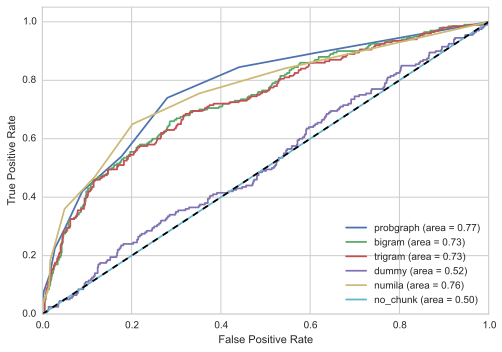

In [11]:
for name in models:
    plt.plot(fpr[name], tpr[name], label='{0} (area = {1:0.2f})'
                                         ''.format(name, roc_auc[name]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('figs/roc.pdf')